## Activity 1: Analyze Titanic Test Dataset
This dataset contains detailed information on the passengers aboard the Titanic. We can start be exploring the test dataset

In [22]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

%matplotlib inline

test_df = pd.read_csv('titanic_data/test.csv')

In [23]:
test_df.head()

,index,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Survived
0,709,3,25.0,1,1,15.2458,0,1,1
1,439,2,31.0,0,0,10.5000,0,1,0
2,840,3,20.0,0,0,7.9250,0,1,0
3,720,2,6.0,0,1,33.0000,1,0,1
4,39,3,14.0,1,0,11.2417,1,0,1


In [24]:
test_df.describe()

,index,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Survived
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,436.111732,2.223464,29.890112,0.402235,0.391061,30.684473,0.385475,0.614525,0.413408
std,260.349331,0.877501,13.396918,0.730703,0.863185,39.447725,0.488073,0.488073,0.493826
min,5.000000,1.000000,0.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,216.500000,1.000000,21.500000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,422.000000,3.000000,27.000000,0.000000,0.000000,14.500000,0.000000,1.000000,0.000000
75%,655.000000,3.000000,37.000000,1.000000,0.000000,32.410400,1.000000,1.000000,1.000000
max,889.000000,3.000000,71.000000,4.000000,5.000000,262.375000,1.000000,1.000000,1.000000


Here's one way to display the distribution of the data, grouping based on survival.

<AxesSubplot:xlabel='Survived'>

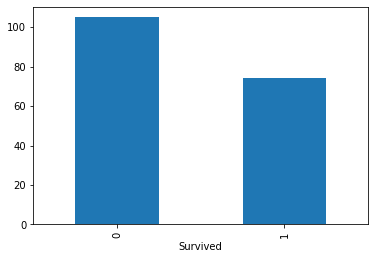

In [25]:
test_df.groupby(['Survived']).count()['index'].plot(kind='bar')

Choose another feature to plot the distribution of and plot it here

In [26]:
# YOUR CODE HERE

## Activity 2: Import and Analyze Models
We pre-trained two models based on the Titanic training dataset. Let's import these models and review their accuracy. Note that the difference between the models is one uses sex as a feature and one does not.

In [27]:
# we split the data into our inputs and the label
test_df = test_df.drop(['index'], axis=1)
X_test = test_df.drop(['Survived'], axis=1)
y_test = test_df['Survived']

In [28]:
# we want to extract a testing set without sex information as well 
X_test_unaware = X_test.drop(['Sex_female', 'Sex_male'], axis=1)
X_test_unaware.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,25.0,1,1,15.2458
1,2,31.0,0,0,10.5000
2,3,20.0,0,0,7.9250
3,2,6.0,0,1,33.0000
4,3,14.0,1,0,11.2417


In [29]:
# import the regular model
model = pickle.load(open('titanic_data/model.pkl','rb'))

# import the sex unaware model
model_unaware = pickle.load(open('titanic_data/model_unaware.pkl','rb'))

/home/eduardo/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/eduardo/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/eduardo/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [30]:
# let's use the models on our test data to get predicted labels
y_pred = model.predict(X_test)
y_pred_unaware = model_unaware.predict(X_test_unaware)

In [14]:
# now we can compute the accuracy of those predictions
print('Accuracy Score for model trained with Sex as a feature', accuracy_score(y_pred, y_test))
print('Accuracy Score for model trained without Sex as a feature', accuracy_score(y_pred_unaware, y_test))

Accuracy Score for model trained with Sex as a feature 0.8044692737430168
Accuracy Score for model trained without Sex as a feature 0.7430167597765364


## Activity 3: Fairness Metrics Evaluation
Let's analyze the fairness of these model using the fairness metrics discussed in class.

In [31]:
# Merge data and predicted labels
merged_labels_and_predictions = pd.concat([X_test, pd.DataFrame(y_test, columns=['Survived']), pd.DataFrame(y_pred, columns=['Predicted Survival']), pd.DataFrame(y_pred_unaware, columns=['Predicted Survival Unaware'])], axis=1)

### Group Unaware

The first model (model) is not group unaware with respect to sex since sex is used as an input feature that the model is trained on.

The second model (model_unaware) is group unaware with respect to sex since the dataset it trains on does not include information about sex.

### Demographic Parity

In [12]:
## Calculate Demographic Parity by Gender for the first model 
## Calculate positive rates by gender

# Positive Rates by Gender

In [13]:
## Calculate Demographic Parity by Passenger class for the first model 
## Calculate positive rates by passenger class

# Positive Rates by Pclass


In [14]:
## Calculate Demographic Parity by Gender for the sex unaware model 
## Calculate positive rates by gender

# Positive Rates by Gender


In [15]:
## Calculate Demographic Parity by Passenger class for the sex unaware model
## Calculate positive rates by passenger class

# Positive Rates by Pclass

### Equalized Odds and Other Metrics
Fill in the code for computing equalized odds below. Feel free to explore any other fairness metrics that seem interesting to you! One thing to compute is true and false positive and true and false negative rates for each of the models to determine if there's anything unexpected here.

In [32]:
## Calculate Equalized Odds
## Calculate true positive rates by gender
## Calculate true positive rates by passenger class


In [17]:
# YOUR CODE HERE

## Activity 4: Recommendation 
Based on the analysis and evaluations we've done above (both fairness and accuracy), would you recommend that one of these models is used in practice by the cruise line company?


Justify your choice with evidence that you produced in previous activities. 